In [125]:
import pandas as pd
import numpy as np

filename = 'game_history.csv'

try:
    game_history = pd.read_csv(filename)
except FileNotFoundError:
    game_history = pd.DataFrame(columns = [
        "Game ID",
        "Player 1",
        "Player 2",
        "Winner",
        "Player 1 Type",
        "Player 2 Type",   
    ])

game_history

,Game ID,Player 1,Player 2,Winner,Player 1 Type,Player 2 Type
0,0,User,Robot,User,Human,Bot
1,1,User 1,User 2,User 1,Human,Human
2,2,User,Robot,User,Human,Bot
3,3,User 1,User 2,User 1,Human,Human
4,4,User 1,User 2,User 2,Human,Human
5,5,User,Robot,Robot,Human,Bot
6,6,User 1,User 2,User 2,Human,Human
7,7,User,Robot,Robot,Human,Bot
8,8,User,Robot,Draw,Human,Bot
9,9,User,Robot,User,Human,Bot


### 1. Generate win rate bars for User 1 and User 2 (human vs human).

  Human Player  Win Rate
0       User 1       0.5
1       User 2       0.5


<AxesSubplot:xlabel='Human Player'>

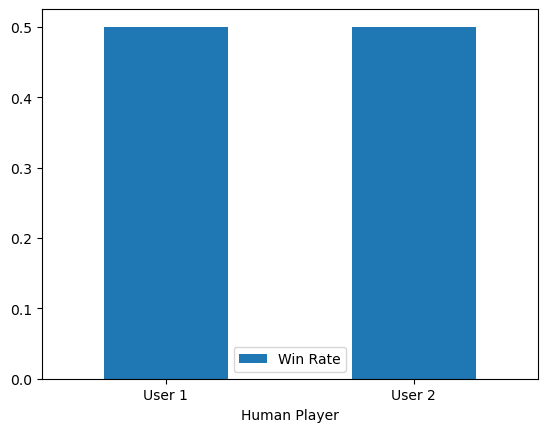

In [126]:
Temp1 = len(game_history[game_history["Winner"] == "User 1"])
Temp2 = len(game_history[game_history["Winner"] == "User 2"])
Temp3 = len(game_history[game_history["Player 2 Type"] == "Human"])

win_rate_of_User1_in_human_vs_human = Temp1 / Temp3
win_rate_of_User2_in_human_vs_human = Temp2 / Temp3

bar_statistics = pd.DataFrame(columns = ["Human Player", "Win Rate"])
bar_statistics.loc[len(bar_statistics)] = {"Human Player": "User 1", "Win Rate": win_rate_of_User1_in_human_vs_human}
bar_statistics.loc[len(bar_statistics)] = {"Human Player": "User 2", "Win Rate": win_rate_of_User2_in_human_vs_human}

print(bar_statistics)
bar_statistics.plot.bar(x = "Human Player", y = "Win Rate", rot = 0)

### 2. Generate win rate pie chart for User and Robot (human vs bot).

  Winner  Win Rate
0   User     0.500
1  Robot     0.375
2   Draw     0.125


<AxesSubplot:ylabel='Win Rate'>

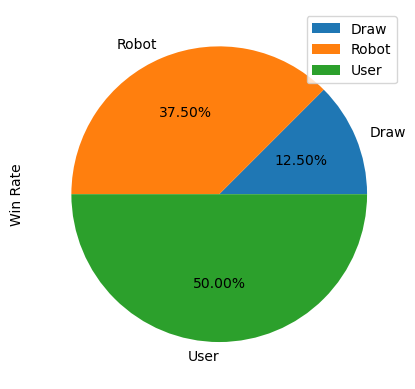

In [127]:
Temp1 = len(game_history[game_history["Winner"] == "User"])
Temp2 = len(game_history[game_history["Winner"] == "Robot"])
Temp3 = len(game_history[game_history["Winner"] == "User"]) + len(game_history[game_history["Winner"] == "Robot"]) + len(game_history[game_history["Winner"] == "Draw"])

win_rate_of_User_in_human_vs_bot = Temp1 / Temp3
win_rate_of_Robot_in_human_vs_bot = Temp2 / Temp3
draw_rate_in_human_vs_bot = 1 - win_rate_of_User_in_human_vs_bot - win_rate_of_Robot_in_human_vs_bot

pie_statistics = pd.DataFrame(columns = ["Winner", "Win Rate"])
pie_statistics.loc[len(pie_statistics)] = {"Winner": "User", "Win Rate": win_rate_of_User_in_human_vs_bot}
pie_statistics.loc[len(pie_statistics)] = {"Winner": "Robot", "Win Rate": win_rate_of_Robot_in_human_vs_bot}
pie_statistics.loc[len(pie_statistics)] = {"Winner": "Draw", "Win Rate": draw_rate_in_human_vs_bot}

print(pie_statistics)
pie_statistics.groupby("Winner").sum().plot.pie(y = "Win Rate", autopct = "%1.2f%%")

### 3. Generate the moving win rate of Robot (human vs bot).

   index  Game ID Player 1 Player 2 Winner Player 1 Type Player 2 Type
0      0        0     User    Robot   User         Human           Bot
1      2        2     User    Robot   User         Human           Bot
2      5        5     User    Robot  Robot         Human           Bot
3      7        7     User    Robot  Robot         Human           Bot
4      8        8     User    Robot   Draw         Human           Bot
5      9        9     User    Robot   User         Human           Bot
6     10       10     User    Robot   User         Human           Bot
7     11       11     User    Robot  Robot         Human           Bot
   Round  Moving Win Rate
0      1         0.000000
1      2         0.000000
2      3         0.333333
3      4         0.500000
4      5         0.400000
5      6         0.333333
6      7         0.285714
7      8         0.375000


<AxesSubplot:xlabel='Round'>

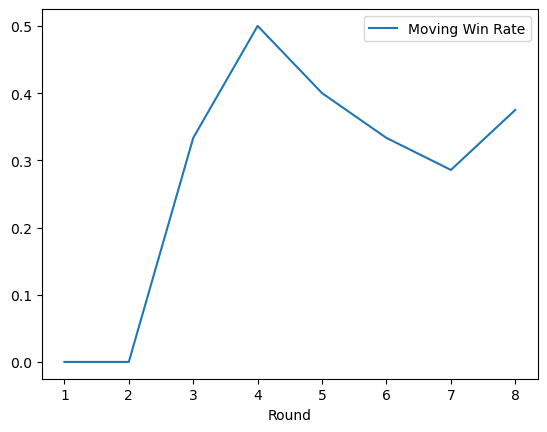

In [128]:
game_history_of_human_vs_bot = pd.DataFrame(columns = [
    "Game ID",
    "Player 1",
    "Player 2",
    "Winner",
    "Player 1 Type",
    "Player 2 Type",   
])

game_history_of_human_vs_bot = game_history[game_history["Player 2 Type"] == "Bot"]
game_history_of_human_vs_bot = game_history_of_human_vs_bot.reset_index()
print(game_history_of_human_vs_bot)

rolling_statistics = pd.DataFrame(columns = ["Round", "Moving Win Rate"])
count = 0
for round in range(len(game_history_of_human_vs_bot)):
    if game_history_of_human_vs_bot.loc[round]["Winner"] == "Robot":
        count = count + 1
    moving_win_rate = count / (round+1)
    rolling_statistics.loc[len(rolling_statistics)] = {"Round": round+1, "Moving Win Rate": moving_win_rate}

print(rolling_statistics)
rolling_statistics.plot.line(x = "Round", y = "Moving Win Rate")